# 로지스틱 회귀
- 이진 분류 및 로지스틱 회귀
  - 이진 분류(binary classification) 2개의 클래스에 대해 분류하는 문제 형태
    - ex) class1. 합격, class2. 불합격
    - ex) class1. 일반 메일, class2. 스팸 메일
  - 다중 클래스 분류(multi-classification): 3개 이상의 클래스에 대해 분류하는 문제 형태
  - 로지스틱 회귀: 선형 회귀를 분류에 맞게 조금 더 수정하여 이진 분류를 풀 수 있도록 한 것
    - 로지스틱 회귀는 이름은 뒤에 회귀가 붙지만, 분류 문제에 많이 활용됨.

- 이진 분류 예시
  - 시험 점수에 따른 합격, 불합격을 판정하고자 하는 상황을 가정.
    - 불합격: 0, 합격: 1로 표현
  - 우측의 점수 및 결과 그래프를 봤을 때, H(x) = W*x + b 형태의 가설로는 분류가 어려움.
    - 직선을 구부려서 55이하는 0, 60 이상은 1로 표현할 수 있도록 하는 함수 f가 필요함.
  - 선형 회귀와 같이 W, b를 활용하고 최종적인 가설의 형태는 H(W*x+b)와 같이 설정함.

- 로지스틱 회귀 - 시그모이드 함수
  - 시그모이드(sigmoid) 함수는 앞의 예시에서 필요로 하는 조건을 충족하는 함수의 일종임.
    - sigmoid의 결과값: [0, 1]의 범위를 가지며, 곡선 향태로 단조 증가 함수이다.
    - -∞쪽으로 갈수록 0에 가까워지며, +∞쪽으로 갈수록 1에 가까워짐.
    - sigmoid(x) = 1 / (1 + np.exp(-x))

- 로지스틱 회귀 - 임계값
  - 시그모이드 함수를 활용한 로지스틱 회귀는 결과값으로 0부터 1사이의 값을 출력하게 됨.
  - 보틍 출력된 값이 0.5 이상, 0.5 미만에 따라서 클래스를 구분함.
    - 이 때, 기준으로 사용하는 0.5를 임계값(threshold)라고 하며, 조건에 따라 다른 값을 쓰기도 함.

- 로지스틱 회귀에서의 손실 함수
  - 선형 회귀에서는 MSE를 비용 함수로 사용함.
  - cost(W, b)는 다음 아래와 같은 수식으로 나타낸다.

    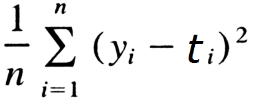
  - 선형 회귀일 때와 다르게 기존의 가설 식(W*x + b)에서 sigmoid를 덧씌워 hypo = sigmoid(W*x + b)로 가설이 달라졌기 때문에, W값 변화에 따라 cost가 다른 결과가 나온다.
  - 로지스틱 회귀에서 W 변화에 따라 MSE의 값이 로컬 미니멈에 도달할 수도 있고, 글로벌 미니멈에도 도달할 수 있다.
  - 다수의 로컬 미니멈이 존재하지만 보다 최적화하기 좋은(글로벌 미니멈에 도달하기 쉬운) 손실함수를 쓰는 것이 학습에 용이함.
  - 분류에서 자주 사용하는 손실 함수는 "cross entropy(CE) loss"라고 불리는 함수이다.
  - cross entropy(CE) loss
    - cost(H(x), y) = -[y*logH(x) + (1 - y)*log(1 - H(x))]
      - H(x) = 예측값(hypo)
      - y = 실제값(정답)

- 로지스틱 회귀 - CE loss
  - cross-entropy: 특정 클래스일 확률을 0 ~ 1사이로 나타내었을 때, 실제 클래스(0 또는 1)와 얼마나 차이나는지를 정량화한 손실 함수의 일종

- 로지스틱 회귀 구현
  - 이진 분류 문제에 대한 로지스틱 회귀 모델 구현에 대해 알아보자.
    - 원, 삼각형 데이터들은 각각 class 0, class 1에 해당함.
    - 입력 데이터를 살펴보면, [1, 2], [2, 5] 등 한 데이터당 2개의 값으로 이루어져 있다.
    - 즉, 독립변수 2개를 입력받아서 sigmoid 함수에 입력하기 위한 출력값 하나를 생성할 가중치가 필요함.
    - sigmoid 함수는 nn.Sigmoid()로 활용 가능


      class LogisticRegression(nn):
        def __init__(self):
          super().__init__()
          self.linear = nn.Linear(2,1)
          self.sigmoid = nn.Sigmoid()
        def forward(self, x):
          return self.sigimoid(self.linear(x))


  - 학습 코드


      x_train = torch.FloatTensor([[1,2], [2,3], [3,1], [4,3], [5,3],[6,2]])
      y_train = torch,FloatTensor([[0], [0], [0], [1], [1], [1]])

      model = LogisticRegression()

      optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
      nb_epochs = 1000
      for epoch in range(nb_epochs+1):
        prediction = model(x_train)
        cost = F.binary_cross_entropy(prediction, y_train) # 파이토치에서 제공하는 이진 분류에 대한 CE loss 함수

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if epoch % 100 == 0: # 100번마다 로그 출력
          predicted_class = prediction >= torch.FloatTensor([0.5]) # 임계값 0.5를 넘으면, class1(True)로 간주
          correct_predicion = predicted_class.float() == y_train # 예측값과 실제값이 일치하는 경우만 True가 되고 그렇지 않으면 False가 됨.
          accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
          print(f'Epoch {epoch} / {nb_epochs} Cost: {cost.item():.6f} Accuracy: {accuracy*100}')


- 학습로그
  - 학습 데이터에서 100% 정확도를 보인다고 해서 다른 데이터들에 대해서도 100% 정확도를 보이는 것은 아니다.

- 추론 코드 및 결과
  

    test_data = torch.FloatTensor([[5,5], [1,4]])
    prediction = model(test_data)
    print(prediction)


# 소프트맥스 회귀
- 소프트맥스 회귀 - 다중 클래스 분류
  - 3개 이상의 클래스에 대해 분류하는 경우를 가정함.

- 소프트맥스 회귀 - 로지스틱 회귀와의 비교
  - 로지스틱 회귀
    - 가설: H(X) = sigmoid(W*X + B)
    - X = [[x1, x2, x3, x4]]  ->  W*X + B  ->  sigmoid  ->  prediction > 0.5
    -> True이면 class1, False이면 class2
  
  - 소프트맥스 회귀
    - 가설: H(X) = softmax(W*X + B)
    - X = [[x1, x2, x3, x4]]  ->  W*X + B  -> ?  -> class1, class2, class3 분류

- 소프트맥스 회귀 - softmax 함수
  - 소프트맥스(softmax) 함수
    - n개의 값을 갖는 임의의 벡터를 합계가 1인 확률값 분포로 바꾸어 줌.

    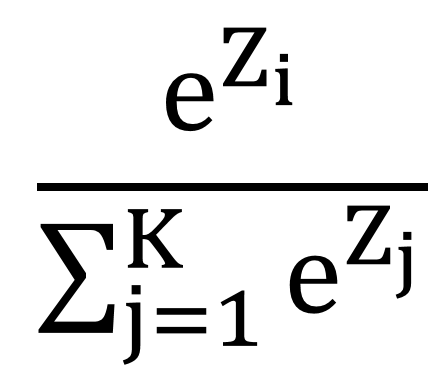

- 소프트맥스 회귀 개요
  - 소프트맥스 회귀의 전체적인 구조
    - 1. SepalLengthCm -> x1, SepalLengthCm -> x2, PetalLengthCm -> x3, PetalWidthCm -> x4
    - 2. Z = [[?], [?], [?]] -> softmax -> [[0.26], [0.71], [0.04]] -> [[class1], [class2], [class3]]

- 소프트맥스 회귀에서의 가중치
  - 4개의 특징점으로부터 3개의 값을 갖는 소프트맥스 함수의 입력으로 바꾸기 위해서는 행렬 연산을 수행하면 되고, 이 때 행렬 곱셈에 사용되는 W 및 행렬 덧셈에 사용되는 B가 존재함.
  - Z = W*X + B
  - 예측값 = Softmax(Z)

- 소프트맥스 회귀 - One-Hot encoding
  - 오차를 구하기 위해서 소프트맥스 결과값(예측값)과 같은 차원의 레이블 정보를 생성함.
    - 해당 클래스는 확률 1, 나머지 클래스는 확률 0으로 만든 이러한 벡터 생성 방식을 one-hot encoding이라고 함.
    - ex) class1의 one-hot 벡터 = [[1], [0], [0]]
    - ex) class2의 one-hot 벡터 = [[0], [1], [0]]
    - ex) class3의 one-hot 벡터 = [[0], [0], [1]]

- 소프트맥스 회귀에서의 손실값 계산 및 학습
  - 소프트맥스 회귀 과정
    - shape가 같은 예측값 및 레이블(실제값) 텐서로부터 손실값을 구하고, 경사하강법을 통해 학습을 진행함.
    - ex)
          1. 예측값 = [[0.26], [0.71], [0.04]],
             실제값 = [[0], [1], [0]] # class2의 원-핫 벡터
          2. 오차 계산
          3. 오차로부터 가중치와 편향 업데이트


- 소프트맥스 회귀 - 손실 함수
  - 오차를 구하기 위한 손실 함수로는 cross entropy(CE) 함수를 활용함.
  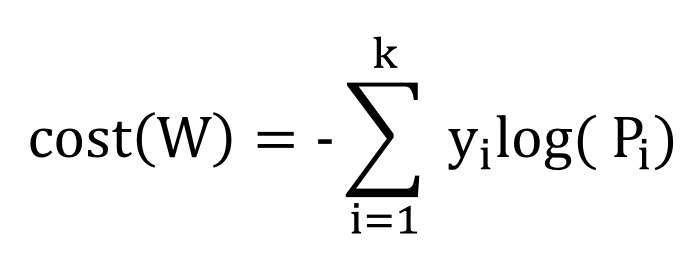

  - 1. 각 클래스에 대한 오차를 모두 더해서 최종 오차를 계산한다.
  - 2. 실제값에 해당하는 클래스 말고는 모두 y값이 0이 되므로 값이 0으로 바뀐다.
  - 3. 오차가 매겨지는 실제 클래스에서는 해당 클래스임을 예측하는 확률에 대한 로그 함수값에 -1을 곱한 것이 오차값이 된다.
    - -1을 곱했기 때문에, 해당 클래스일 확률을 1에 가깝게 예측할수록 손실값이 0에 가까워지고 0에 가깝게 예측할수록 손실값이 무한대에 가까워지게 됨.

- 소프트맥스 회귀 구현
  - 모델 코드
    - 소프트맥스 회귀 모델은 예측값 생성 시, softmax 연산을 수행한 확률값을 출력하여야 하지만, PyTorch에서는 손실값 계산 시 자동으로 softmax연산까지 수행하므로 일반적으로 모델 코드에서 softmax를 생략하고 사용함.
    - 예측값 생성 및 출력 시에는 별도의 softmax 연산이 필요함.


    class SoftmaxRegression(nn.module):
      def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
        # PyTorch의 cross_entropy class는 손실값 계산 시의 softmax 연산까지 포함되어 있음.
      
      def forward(self, x):
        return self.linear(x)


  - 학습 코드(데이터셋 및 모델 생성)
    - PyTorch에서 softmax 기반의 분류를 수행할 때는 레이블 정보를 long type의 1D 텐서로 입력해주어야 함.
    - 손실값 계산 시의 one-hot vector 생성은 내부적으로 자동으로 수행됨.


      x_train = torch.FloatTensor([[6.3, 3.3, 6.0, 2.5],
                                   [5.8, 2.7, 5.1, 1.9],
                                   [7.1, 3.0, 5.9, 2.1],
                                   [5.1, 3.5, 1.4, 0.2],
                                   [4.9, 3.0, 1.4, 0.2],
                                   [4.7, 3.2, 1.3, 0.2],
                                   [7.0, 3.2, 4.7, 1.4],
                                   [6.4, 3.2, 4.5, 1.5],
                                   [6.9, 3.1, 4.9, 1.5]])
      y_train = torch.LongTensor([0, 0, 0, 1, 1, 1, 2, 2, 2])
      model = SoftmaxRegression()


  - 학습 코드(학습 루프)
    - F.cross_entropy를 이용해서 CE loss를 간편하게 구현 가능
    - argmax를 dim 1에 대해 수행하면, 각각의 데이터에 대한 예측값에서 가장 큰 값의 index(class number)가 반환됨.



      optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
      nb_epochs = 1000
      for epoch in range(nb_epochs + 1):
        prediction = model(x_train)
        cost = F.cross_entropy(prediction, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if epoch % 100 == 0:
          correct_prediction = torch.argmax(prediction, 1) == y_train
          accuracy = correct_prediction.float().mean().item()
          print(f'Epoch {epoch} / {nb_epochs} Cost: {cost.item():.6f} Accuracy: {accuracy*100}')



  - 테스트
    - 학습 완료된 모델의 성능 평가를 목적으로 추론 및 다양한 성능 지표 계산 수행
  
    
    
    test_data = torch.FloatTensor([[6.3, 2.9, 5.6, 1.8],
                                   [6.5, 3.0, 5.8, 2.2],
                                   [4.6, 3.1, 1.5, 0.2],
                                   [5.0, 3.6, 1.4, 0.2],
                                   [5.5, 2.3, 4.0, 1.3],
                                   [6.5, 2.8, 4.6, 1.5]])
    # class 0, class 1, class 2을 2개씩 포함하고 있는 테스트 데이터 셋
    prediction = F.softmax(model(test_data),dim=1)
    print(prediction)


# 미니 배치 및 데이터로더
- 미니 배치
  - 지금까지의 학습코드의 경사하강법을 보면, 데이터 셋 전체에 대해 한번에 "예측값 계산 -> 미분값 계산 -> W, b 업데이트"를 수행함.
    - 이처럼 전체 데이터를 한꺼번에 사용하는 경사하강법을 배치 경사하강법(batch gradient descent)이라고 한다.
    - 배치(batch): 전체 데이터 묶음을 의미함.
  - 왜 미니 배치 경사하강법을 사용을 하는가?
    - (문제점) 데이터 셋이 너무 크면, 한번에 메모리에 올려서 계산하기 힘들다.  
    - (해결책) 미니 배치 경사하강법(mini-batch gradient descent): 데이터 셋을 여러 조각으로 나누어서 경사하강법을 수행하자.
      - 이때, 경사하강법을 수행하는 단위인 작은 데이터 묶음을 미니 배치라고 한다.
      - 미니배치의 크기 = 배치 크기(batch size)
      - [[batch]] -> [[Mini_batch 1], [Mini_batch 2], [Mini_batch 3], [Mini_batch 4], [Mini_batch 5]]

- 이터레이션 및 에포크
  - 에포크(epoch): 데이터 셋 전체에 대해 모두 경사하강법을 수행하는 단위
  - 이터레이션(iteration): 경사하강법을 수행하는 횟수 하나 하나
    - In 배치 경사하강법, "1 iteration = 1 epoch"가 된다.
    - In 미니 배치 경사하강법, 특정 횟수의 iteration이 쌓여야 1epoch가 됨.
  - ex) 학습 데이터가 2000개가 있을 때, batch size가 200이라고 가정하자.
    - 전체 데이터 셋은 미니 배치 10개로 이루어지다고 했을 때, 10 iteration을 학습시켜야 1 epoch가 증가하게 됨.

- 데이터 셋 및 데이터 로더
  - 데이터 로더(DataLoader): In PyTorch, 미니 배치 경사하강법 수행을 위해 데이터 로더 클래스를 제공한다.
    - 데이터 로더(DataLoader): 미니 배치를 하나씩 반환해주는 iterator라고 보면 됨.
  - DataLoader 활용을 위해서는 데이터 셋 객체부터 생성해야 하며, 데이터 셋은 다양한 방식으로 생성 가능(텐서에서 데이터 셋 생성 가능, 이미지 폴더에서 데이터 셋 생성 등)



    import torch
    import torch.nn as nn
    import torch.nn.finctional as F
    from torch.utils.data import TensorDataset # 텐서 데이터 셋
    from torch.utils.data import DataLoader # 데이터 로더

    x_train = torch.FloatTensor([[73, 80, 75],
                                 [93, 88, 93],
                                 [89, 91, 90],
                                 [96, 98, 100],
                                 [73, 66, 70]])
    y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])



  - 데이터 로더 생성 시 데이터 셋은 필수로 입력해주어야 함.
  - 그 외 매개변수들은 지정하여 입력 가능
    - batch_size: 직접 상황에 맞게 지정해주는 것이 일반적임.
    - shuffle 옵션: 매 epoch마다 데이터 셋 내의 데이터 순서를 섞을 건지를 결정함.
    - 보통 학습 데이터 셋에서는 shuffle 기능을 활용하며, 테스트 데이터 셋에서는 사용하지 않음.



    dataset = TensorDataset(x_train, y_train)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)



  - 데이터 로더를 활용한 미니 배치 경사하강법 학습 for문 예시
    - epoch에 대한 for문 안쪽에 미니 배치에 대한 for문이 추가된 것을 확인할 수 있음.
    - enumerate를 활용하는 것이 일반적이나 in 구문으로 값만 받을 수 있다.
    - 현재 데이터 셋은 데이터, 레이블 두 종류의 텐서를 합쳐서 만들어졌으므로 데이터로더에서 이와 유사한 형식의 (데이터. 레이블) 형태의 튜플로 값을 넘겨주게 됨.
      - 만약 4 종류의 텐서로 데이터 셋을 만들었으면, 데이터로더에서는 4 종류의 텐서가 포함된 튜플을 넘겨준다.



      nb_epochs = 20
      for epoch in range(nb_epochs + 1):
        for batch_idx, samples in enumerate(dataloader):
          x_train, y_train = samples


# 소프트맥스 회귀를 이용한 MNIST 데이터 분류

- MNIST 데이터 셋
  - 0 ~ 9까지에 대한 손글씨 데이터 셋
  - 각각의 데이터는 28 X 28 흑백 이미지 형태이다.
  - 총 60,000개의 학습 데이터 및 10,000개의 테스트 데이터가 있다.

  - 소프트맥스 회귀에서 다루는 데이터는 1차원 형태이나 MNIST 데이터는 3차원(가로, 세로, 채널)이므로 입력하기 전에 shape 변경이 필요하다.

- 소프트맥스 회귀를 이용한 MNIST 분류 개요
  - 입력 이미지가 어떤 숫자를 의미하는지 0 ~ 9중에 분류하는 문제
  - 총 10개의 클래스에 대한 분류 문제로 볼 수 있다.
  - 28 pixels * 28 pixels = 784 pixels
  - 1. input of size: (1, 784) -> input(x)
  - 2. W: (784,10) , b: (1,10) -> x*W + b -> Logits: (1, 10)
  - 3. softmax(Logits) -> Probabilites -> Cross-entropy -> One-Hot encoded label와 Cross-entropy 예측값 loss function의 경사하강법을 통해 비교 -> W, b 업데이트  


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset # 텐서 데이터 셋
from torch.utils.data import DataLoader # 데이터 로더

In [24]:
# 모델 코드
# 이미지 데이터를 1차원으로 변환한 크기 784에서 10개의 클래스에 대한 결과값 도출
class MNIST_SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(784, 10)
    # PyTorch의 cross_entropy class는 손실값 계산 시의 softmax 연산까지 포함되어 있음.

  def forward(self, x):
    return self.linear(x)

In [15]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [16]:
# hyperparameter: 총 에포크, 배치 크기 등 학습에 영향을 끼치는 사람이 직접 값을 지정해야하는 변수들
training_epochs = 15
batch_size = 100

In [17]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [18]:
# dataset loader
# 딥러닝 모델의 경우 학습 루프 내에서 매번 F.cross_entropy를 이용해서 손실값을 계산하지 않는다.
# nn.CrossEntropyLoss를 이용해서 손실값을 계산할 객체를 미리 만들어두는 형식을 사용한다.
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기 = 100
                         shuffle=True)

model = MNIST_SoftmaxRegression()
criterion = nn.CrossEntropyLoss() # CE loss를 계산할 객체를 미리 만들어둔다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [25]:
# MNIST 데이터 셋의 경우, 데이터 및 레이블 두 종류의 텐서가 합쳐져 있는 형태이다.
# 데이터로더에서 (데이터, 레이블) 형태의 튜플로 값을 넘겨준다.
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    # 배치 크기 = 100이므로, x_train의 shape = (100, 784)의 텐서가 된다.
    x_train = x_train.view(-1, 28 * 28)
    # 레이블은 one-hot 인코딩이 된 상태가 아니라 0 ~ 9의 정수
    prediction = model(x_train)
    cost = criterion(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print(f'Epoch: {epoch+1} Cost = {avg_cost:.9f}')
print('Learning finished')

Epoch: 1 Cost = 0.534601390
Epoch: 2 Cost = 0.359223068
Epoch: 3 Cost = 0.331152231
Epoch: 4 Cost = 0.316428035
Epoch: 5 Cost = 0.306809276
Epoch: 6 Cost = 0.299909294
Epoch: 7 Cost = 0.295107991
Epoch: 8 Cost = 0.290555567
Epoch: 9 Cost = 0.287304282
Epoch: 10 Cost = 0.284216493
Epoch: 11 Cost = 0.281726062
Epoch: 12 Cost = 0.279646337
Epoch: 13 Cost = 0.277683914
Epoch: 14 Cost = 0.276109993
Epoch: 15 Cost = 0.274308771
Learning finished


Label: 5
Prediction: 4


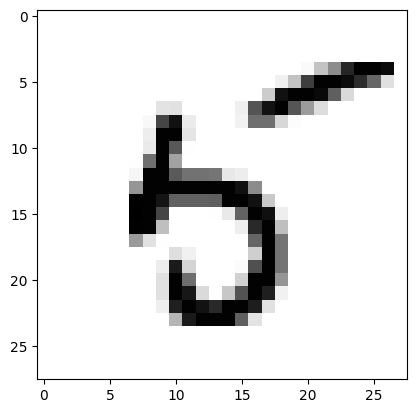

In [26]:
# 테스트 코드
# 전체 테스트 데이터 셋을 한번에 추론 후 정확도를 평가하였는데, 보다 큰 데이터 셋의 경우 테스트에서도 미니 배치를 활용하여 정확도를 계산하고 통계를 산출함.

# 테스트 데이터를 사용하여 모델을 테스트한다.
'''
파이썬 with ?
자원을 획득하고 사용 후 반납해야 하는 경우 주로 사용함.
1. 자원을 획득한다 -> 생성
2. 자원을 사용한다 -> 사용
3. 자원을 반납한다 -> 소멸
'''
with torch.no_grad():
  # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 한다.
  r = random.randint(0, len(mnist_test) - 1)
  x_single_data = mnist_test.data[r:r+1].view(-1, 28*28).float()
  y_single_data = mnist_test.targets[r:r+1]

  print(f'Label: {y_single_data.item()}')
  single_prediction = model(x_single_data)
  print(f'Prediction: {torch.argmax(single_prediction, 1).item()}')

  plt.imshow(mnist_test.data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()